In [1]:
import matplotlib.pyplot as plt
import pnstyler.styler as styler
from runner import load_data, main_path
import ml_confs
from pathlib import Path
import numpy as np
import os
import pickle

In [2]:
configs = ml_confs.from_file(main_path / 'experiments/fluid/configs.yaml')
exp_path = Path(main_path / 'experiments/fluid')
results_path = exp_path / 'results/'
with np.load(exp_path / "data/cylinder2d_remesh.npz") as f:
    full_data = {k: np.asarray(v) for k, v in f.items()}

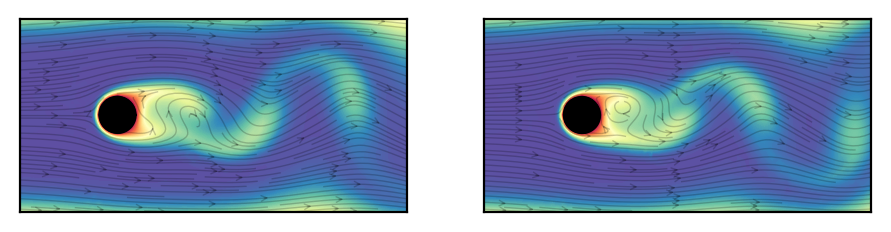

In [3]:
fig, axes = plt.subplots(1, 2, figsize = styler.figsize(width_to_height=3))

cmap = 'Spectral'
streamplot_args = {
    'color':(0, 0, 0, 0.2), #RGBA tuple for the color of the streamlines 0.5 alpha black 
    'density':1.5, 
    'linewidth':0.5, 
    'arrowsize':0.5, 
    'arrowstyle':'->'
}
ax_args = {
    'xticks': [],
    'yticks': [],
    'aspect': 'equal',
    'ymargin': 0
}

for ax_idx, t_idx in enumerate([50, 100]):
    X = full_data['x']
    Y = full_data['y']
    C = full_data['C'][..., t_idx] 
    U = full_data['U'][..., t_idx]
    V = full_data['V'][..., t_idx]
    ax = axes[ax_idx]
    contour = ax.contourf(X, Y, C, 200, cmap=cmap)
    field = ax.streamplot(X, Y, U, V, **streamplot_args)
    ax.set(**ax_args)
    # Plot a full black circle of radius 0.5
    theta = np.linspace(0, 2*np.pi, 100)
    r = 0.45
    ax.plot(r*np.cos(theta), r*np.sin(theta), 'k') 
    ax.fill_between(r*np.cos(theta), r*np.sin(theta), color='k')
fig.savefig('fluid_flow_dynamics.png', bbox_inches='tight', dpi=300)

In [6]:
os.listdir(results_path)
_tmp = {}
for filename in os.listdir(results_path):
    model_name = filename.split('_')[0]
    if model_name not in _tmp:
        _tmp[model_name] = []
    with open(results_path / filename, 'rb') as f:
        restored = pickle.load(f)
    if restored is not None:
        _tmp[model_name].append(restored)

FLUID_FLOW = {}
_fluid_flow_std = 0.16754142
for model_name, model_data in _tmp.items():
    if len(model_data) > 0:
        FLUID_FLOW[model_name] = {
            'data': np.array(model_data).mean(axis=0)/_fluid_flow_std
        }

In [7]:
FLUID_FLOW

{'DynamicalAE': {'data': array([0.0835883 , 0.0811955 , 0.07904559, 0.07896224, 0.08282069,
         0.08958637, 0.09968565, 0.1116533 , 0.12314648, 0.13278511,
         0.14225657, 0.15202826, 0.16202349, 0.17238098, 0.18436509,
         0.19615002, 0.20876217, 0.22119648, 0.23282822, 0.24668414,
         0.26086019, 0.26956854, 0.27542553, 0.2790894 , 0.27970132,
         0.28853423, 0.30103524, 0.30974369, 0.31718348, 0.32293487,
         0.32570129, 0.32603697, 0.32388771, 0.32121778, 0.31873358,
         0.31750863, 0.31582409, 0.31532894, 0.31508222, 0.31422942,
         0.31280369])},
 'ConsistentAE': {'data': array([0.16576218, 0.16494573, 0.16438771, 0.16699799, 0.16620227,
         0.16525735, 0.16706001, 0.17698835, 0.1909216 , 0.20933018,
         0.22302368, 0.23171461, 0.24159778, 0.25459826, 0.27462719,
         0.28742704, 0.29749549, 0.30152944, 0.3023488 , 0.30247795,
         0.30412   , 0.3076044 , 0.308977  , 0.31942749, 0.31834625,
         0.31120152, 0.30956276,

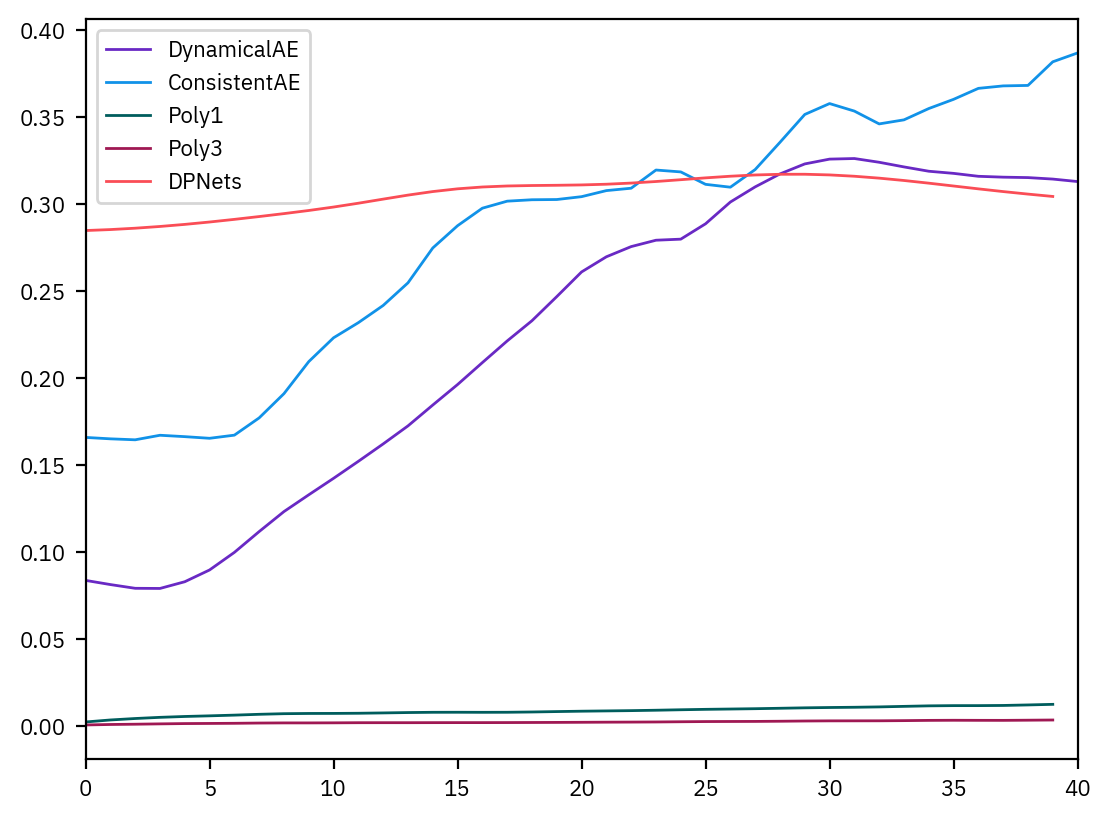

In [10]:
fig, ax = plt.subplots()
for model_name in FLUID_FLOW.keys():
    model_data = FLUID_FLOW[model_name]
    ax.plot(model_data['data'], label=model_name)
ax.legend()
